In [8]:
# I made many more charts than I included in my slide presentation. I wanted to make a wide array of charts to examine the data in different ways. 

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/nateddavis/FinalDataProject/main/Life-Expectancy-Data-Updated.csv'
df = pd.read_csv(url)





In [11]:
df.drop_duplicates(inplace=True)

df.dropna(inplace=True)

df.info()
print(df.select_dtypes(include='object').columns)

num_cols = df.select_dtypes(include=['object']).columns
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[num_cols] = df[num_cols].astype('float64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Middle East'),
  Text(1, 0, 'European Union'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'South America'),
  Text(4, 0, 'Central America and Caribbean'),
  Text(5, 0, 'Rest of Europe'),
  Text(6, 0, 'Africa'),
  Text(7, 0, 'Oceania'),
  Text(8, 0, 'North America')])

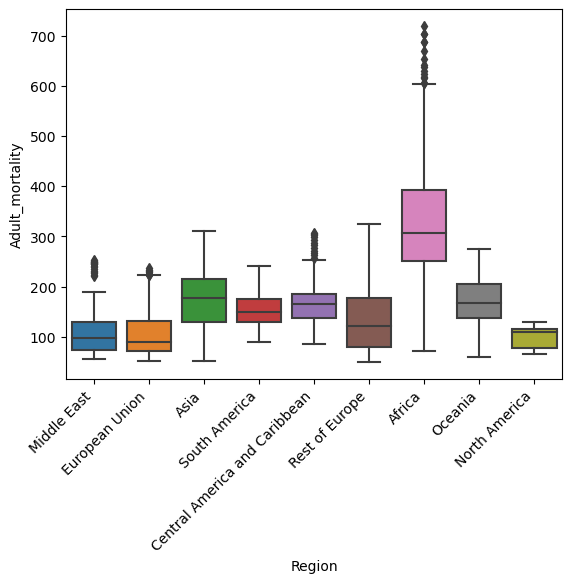

In [14]:
sns.boxplot(x='Region', y='Adult_mortality', data=df)
plt.xticks(rotation=45, ha='right')

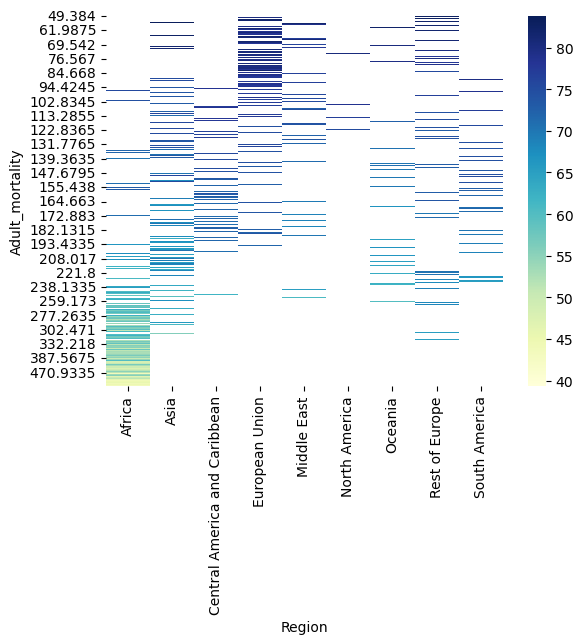

In [22]:
import numpy as np

pivot = df.pivot_table(index='Adult_mortality', columns='Region', values='Life_expectancy', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu')
p.yaxis.ticker = np.arange(len(df['Region'].unique()))
p.yaxis.major_label_overrides = dict(zip(np.arange(len(df['Region'].unique())), df['Region'].unique()))




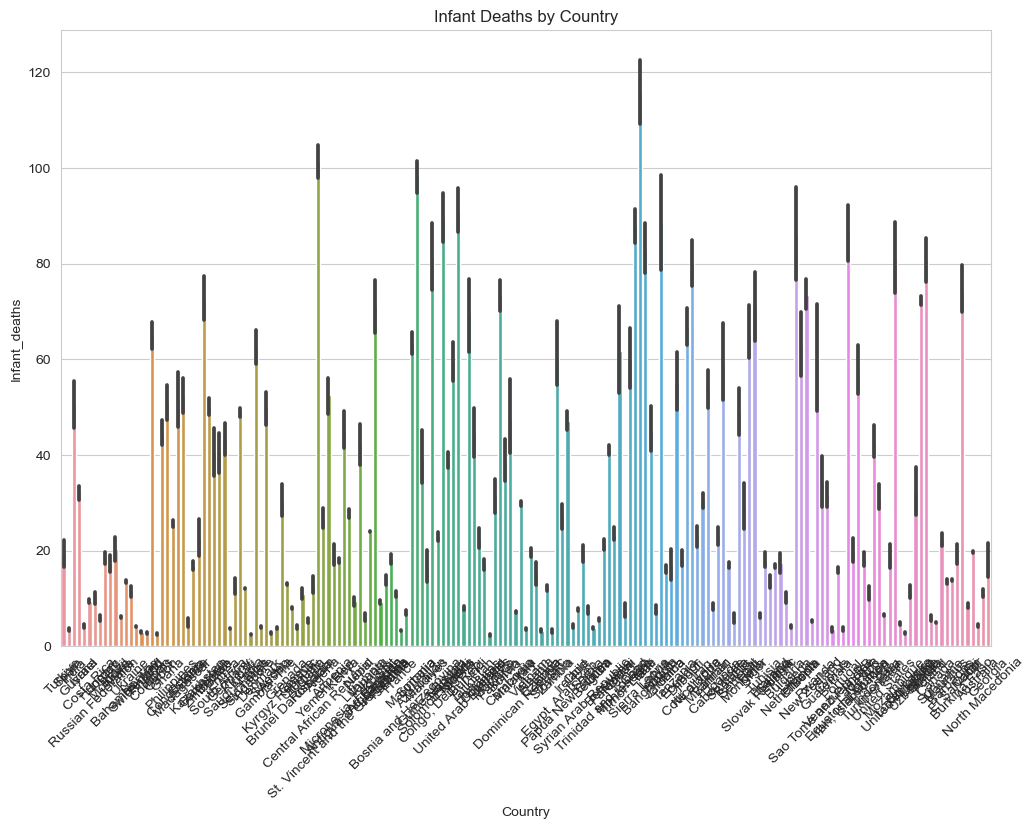

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Infant_deaths', data=df)
plt.xticks(rotation=45)
plt.title('Infant Deaths by Country')
plt.show()


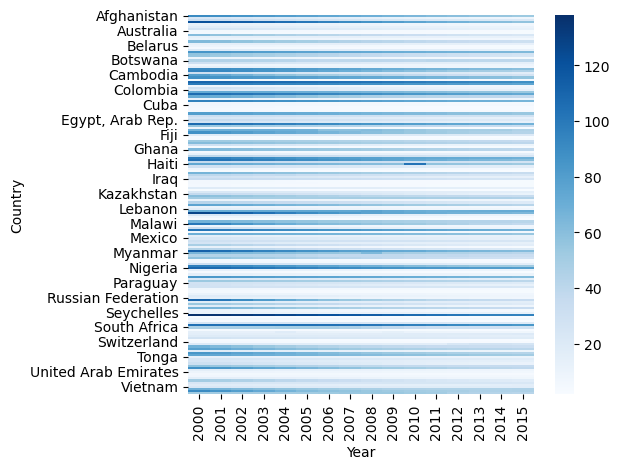

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data=df.pivot_table(index='Country', columns='Year', values='Infant_deaths'), cmap='Blues')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Middle East'),
  Text(1, 0, 'European Union'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'South America'),
  Text(4, 0, 'Central America and Caribbean'),
  Text(5, 0, 'Rest of Europe'),
  Text(6, 0, 'Africa'),
  Text(7, 0, 'Oceania'),
  Text(8, 0, 'North America')])

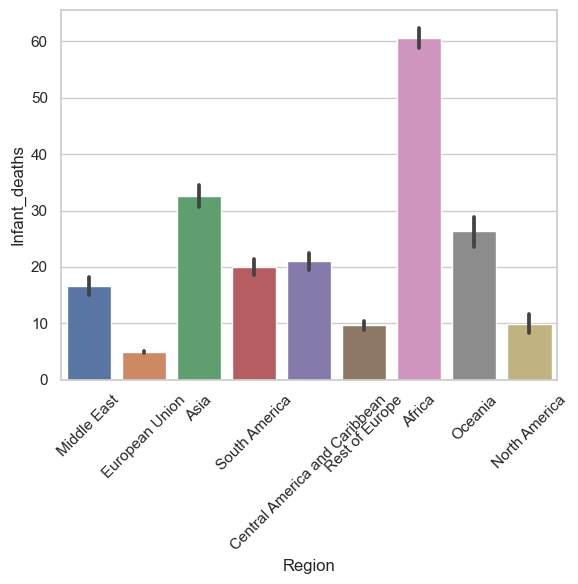

In [27]:
sns.set(style="whitegrid")
sns.barplot(x="Region", y="Infant_deaths", data=df)
plt.xticks(rotation=45)

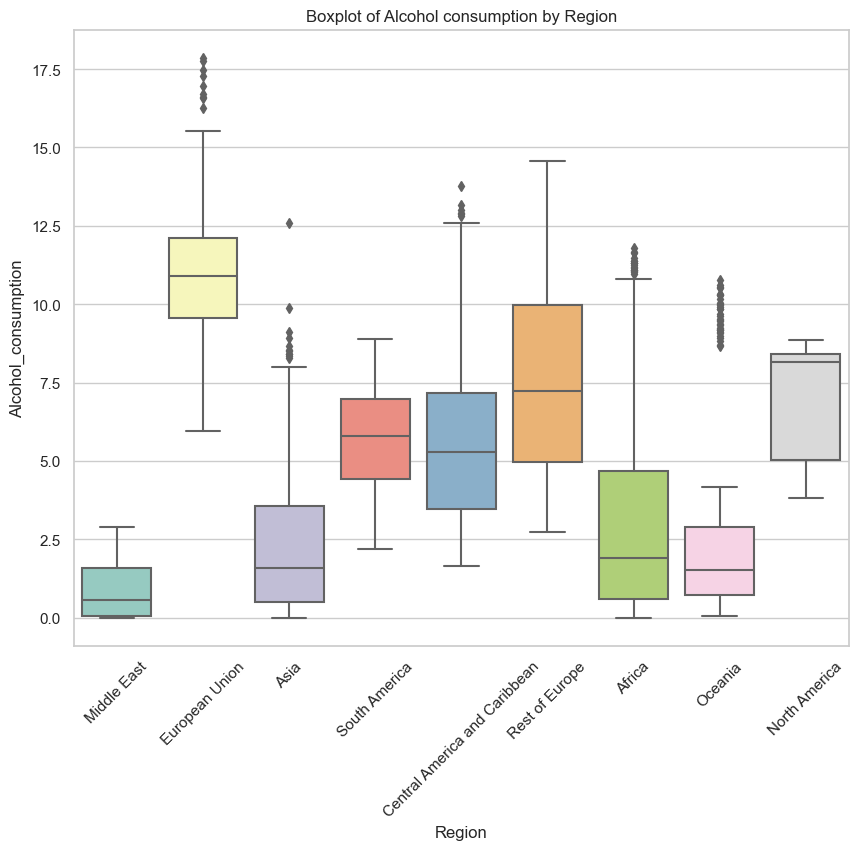

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Region', y='Alcohol_consumption', palette='Set3')
plt.xticks(rotation=45)
plt.title('Boxplot of Alcohol consumption by Region')
plt.show()

In [61]:
#Beginning of Part 3: Modeling the Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

url = 'https://raw.githubusercontent.com/nateddavis/FinalDataProject/main/Life-Expectancy-Data-Updated.csv'
df = pd.read_csv(url)




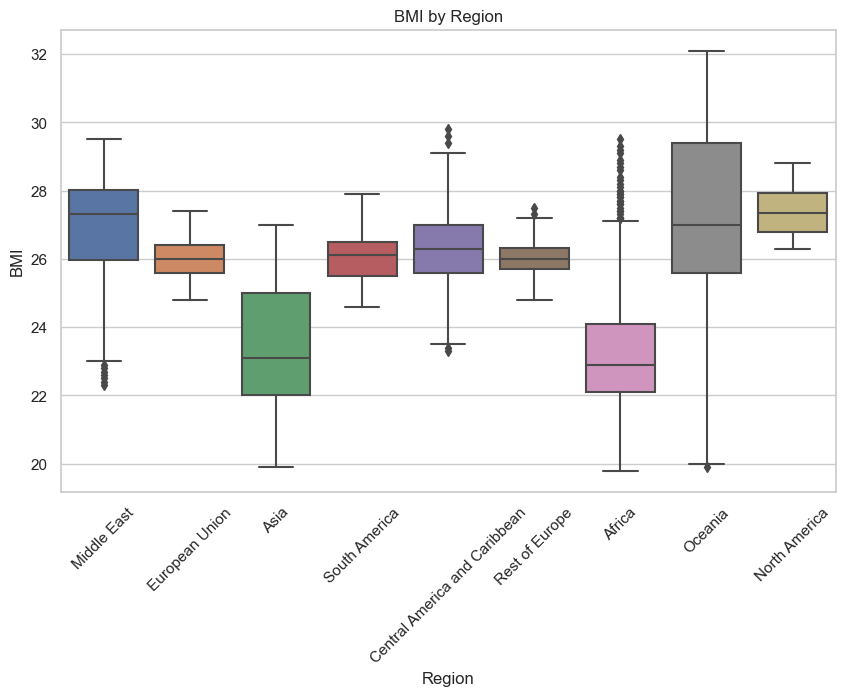

In [30]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='BMI', data=df)
plt.xticks(rotation=45)
plt.title('BMI by Region')
plt.show()

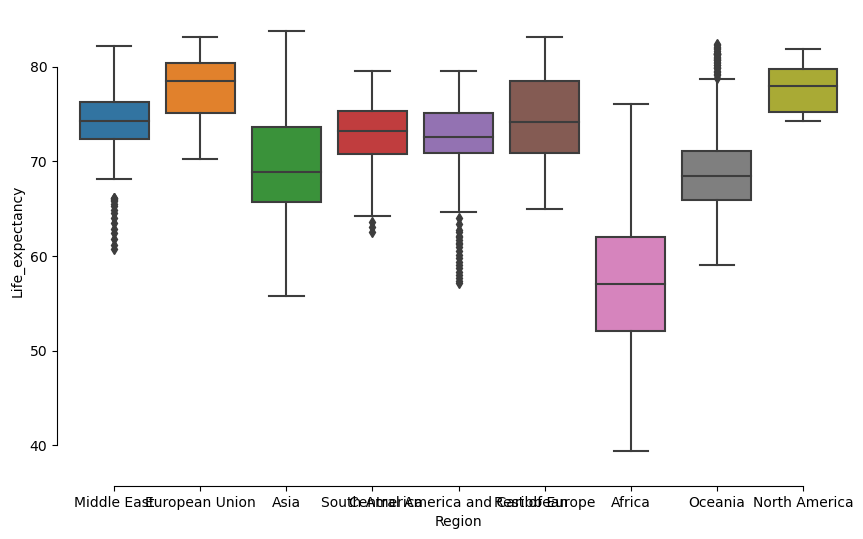

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Life_expectancy', data=df)
sns.despine(offset=10, trim=True)
plt.show()

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [4]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [67]:
X = df.drop('Life_expectancy', axis=1)
y = df['Life_expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = pd.get_dummies(X_train, columns=["Country"], drop_first=True)
X_train_encoded = pd.get_dummies(X_train, columns=['Region'], drop_first=True)
X_train = pd.get_dummies(X_train, columns=["Region"])




In [60]:
non_numeric_cols = df.select_dtypes(exclude=np.number).columns
df.drop(non_numeric_cols, axis=1, inplace=True)


In [47]:
df = df.replace({'?': np.nan, 'Unknown': np.nan})
df = df.dropna()
df = df.rename(columns={'Country or region': 'Country'})
df.columns = df.columns.str.strip()
df = df.reset_index(drop=True)
df_filtered = df.loc[df['Country'] != 'Sri Lanka']

In [22]:
non_numeric_cols = df.select_dtypes(include='object').columns
print(non_numeric_cols)

Index([], dtype='object')


In [68]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [77]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Country']

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_all[categorical_cols])

X_test_encoded = encoder.transform(X_test[categorical_cols])



In [96]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Country'] = le.fit_transform(df['Country'])
df['Region'] = le.fit_transform(df['Region'])

test_features = X_test.rename(columns={
    'Country': 'Country_Bahamas, The', 
    'Region': 'Region_Latin America & Caribbean'})

cat_cols = df.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    print(f"{col}: {test_features[col].unique()}")



In [101]:
y_pred = model.predict(X_train)

In [118]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_scores = -cv_scores

print(f'Cross-validation mean MSE: {cv_scores.mean():.4f}')
print(f'Cross-validation standard deviation of MSE: {cv_scores.std():.4f}')


Cross-validation mean MSE: 0.2816
Cross-validation standard deviation of MSE: 0.0771


In [103]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("Mean squared error (MSE): ", mse)
print("R-squared (R2): ", r2)

Mean squared error (MSE):  0.21948433053685884
R-squared (R2):  0.9975552728350139


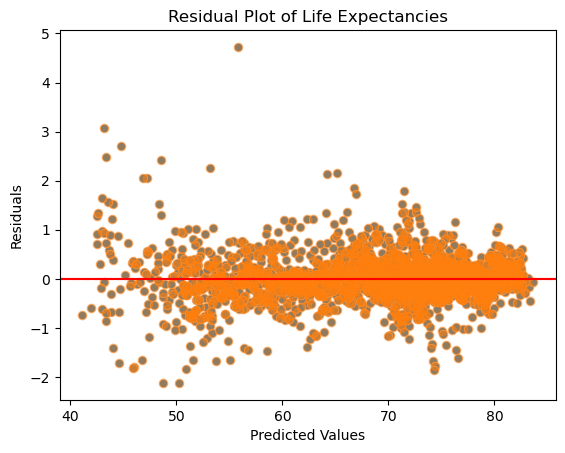

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
residuals = y_train - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot of Life Expectancies')
plt.show()
plt.show()

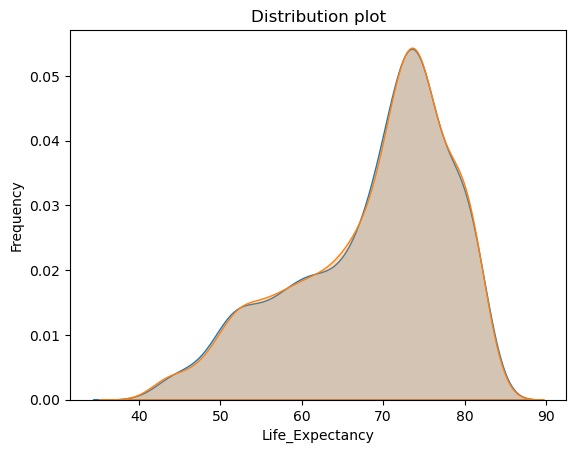

In [110]:
sns.kdeplot(y_train, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)
plt.xlabel('Life_Expectancy')
plt.ylabel('Frequency')
plt.title('Distribution plot')
plt.show()